In [7]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pickle
import time
import re

In [8]:
train_set = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1')



In [9]:
train_set.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [10]:
train_set.columns = ['sentiment','id','date','query','user','text']

In [11]:
# droping unrelevent features
train = train_set[['sentiment', 'text']]

In [12]:
train.head()

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


<Axes: xlabel='sentiment'>

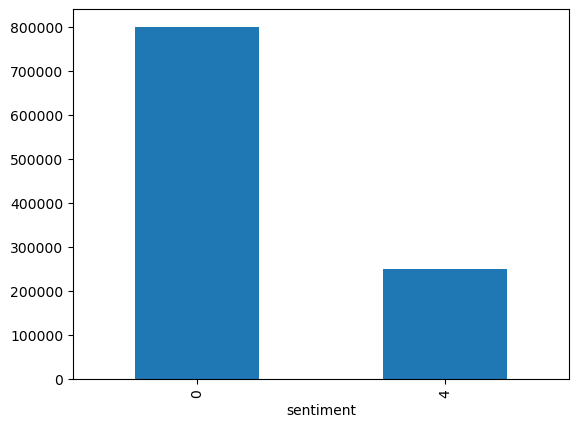

In [13]:
train["sentiment"].value_counts().plot(kind="bar")

In [14]:
train["sentiment"] = train["sentiment"].replace({4:1})

C:\Users\acer\AppData\Local\Temp\ipykernel_48700\728621639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["sentiment"] = train["sentiment"].replace({4:1})


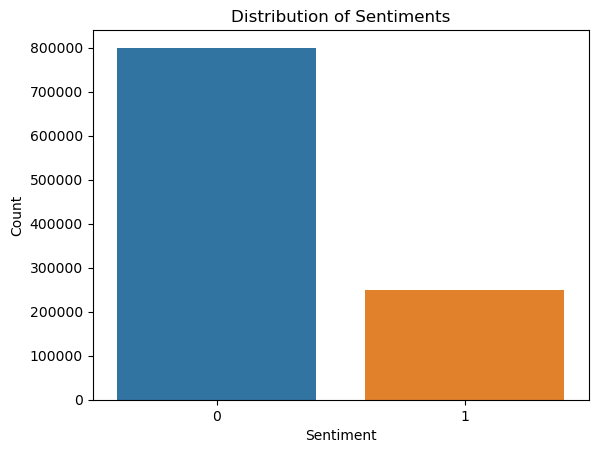

In [15]:
sns.countplot(data=train, x='sentiment')

# Customize plot labels and title if needed
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Show the plot
plt.show()

In [16]:
# checking for duplicates
train.duplicated().sum()

11664

In [17]:
positive = train[train["sentiment"]==1]

positive.value_counts().sum()

248576

In [18]:
negative = train[train["sentiment"]==0]

negative.value_counts().sum()

799996

In [19]:
train.head()

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [20]:
positiveFD = nltk.FreqDist(word for text in train[train["sentiment"] == 1]["text"] for word in text.lower().split())
negativeFD = nltk.FreqDist(word  for text in train[train["sentiment"] == 0]["text"] for word in text.lower().split())

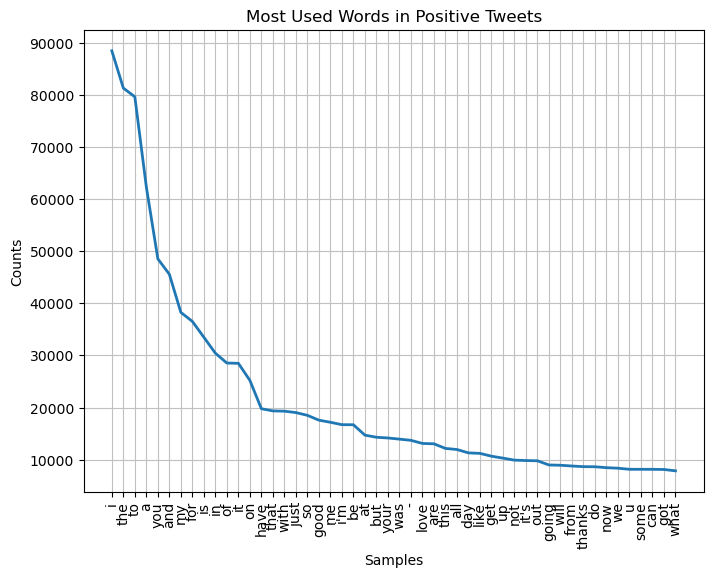

In [21]:
plt.subplots(figsize=(8, 6))
plt.title("Most Used Words in Positive Tweets")
positiveFD.plot(50)
plt.show()

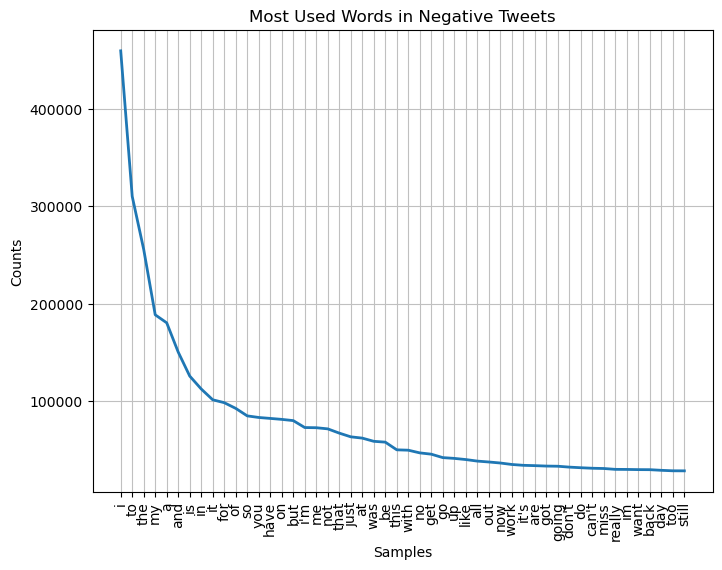

In [17]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Negative Tweets")
negativeFD.plot(50)
plt.show()

Most of the words are same these are all stop words (words that not have spacial meaning) we can see characteristic words such  as panic

## Data Preprocessing 

In [22]:
cleanedData = []

lemma = WordNetLemmatizer()
swords = stopwords.words("english")

for text in train["text"]:
    
    # cleaning links
    text = re.sub(r'https\S+', '', text)
    
    # cleaning everything except alphabetical and numerical characters
    
    text = re.sub("[^a-zA-Z0-9]", " ", text)
    
    #Tokenizing and lemmatizing 
    text = nltk.word_tokenize(text.lower())
    text = [lemma.lemmatize(word) for word in text]
    
    # Removing stopwords
    text = [word for word in text if word not in swords]
    
    
    # Joining 
    text  = " ".join(text)
    
    cleanedData.append(text)
    

In [23]:
for i in range(0,5):
    print(cleanedData[i],end="\n\n")

upset update facebook texting might cry result school today also blah

kenichan dived many time ball managed save 50 rest go bound

whole body feel itchy like fire

nationwideclass behaving mad see

kwesidei whole crew



In [21]:
X = cleanedData
y = train["sentiment"]


In [22]:
# splitting data for training validation and testing

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)

X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [23]:
len(X_train) ,len(X_valid),len(X_test)

(734000, 157286, 157286)

In [24]:
# initializing the TF -IDF veotorizer

tfidf_vectorizer = TfidfVectorizer()

# fitting and transforming training data data
X_train_tf = tfidf_vectorizer.fit_transform(X_train)

# tranforming te validation ad test data 
X_valid_tf = tfidf_vectorizer.transform(X_valid)
X_test_tf = tfidf_vectorizer.transform(X_test)




In [33]:
X_test[6]

'ha worst headache hate sad day'

In [34]:
print(X_test_tf[6])

  (0, 345761)	0.5317716208193008
  (0, 274652)	0.35725525913917255
  (0, 138819)	0.477788328298631
  (0, 137993)	0.3847232528062712
  (0, 135256)	0.3596109332171616
  (0, 88836)	0.28978255970824046


In [38]:
# initialize the test linearSvc

SVC = LinearSVC()


# Train the classifier 

SVC.fit(X_train_tf, y_train)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [39]:
# Predict on the valiation data

val_prediction_svm = SVC.predict(X_valid_tf)

In [40]:
# Predict on the test data

test_prediction_svm = SVC.predict(X_test_tf)

In [41]:
# Calculate accuracy on validation data
val_accuracy_svm = accuracy_score(y_valid, val_prediction_svm)
print("Validation Accuracy:", val_accuracy_svm)

# on test data
test_accuracy_svm = accuracy_score(y_test, test_prediction_svm)
precision_svm = precision_score(y_test, test_prediction_svm)
recall_svm = recall_score(y_test, test_prediction_svm)
f1_svm = f1_score(y_test, test_prediction_svm)
roc_auc_svm = roc_auc_score(y_test, test_prediction_svm)
conf_matrix_svm = confusion_matrix(y_test, test_prediction_svm)

print(f'Accuracy: {test_accuracy_svm}')
print(f'Precision: {precision_svm}')
print(f'Recall: {recall_svm}')
print(f'F1 Score: {f1_svm}')
print(f'ROC AUC: {roc_auc_svm}')
print(f'Confusion Matrix:\n{conf_matrix_svm}')


Validation Accuracy: 0.833055707437407
Accuracy: 0.8331320015767455
Precision: 0.6990947797774518
Recall: 0.5227826086956522
F1 Score: 0.5982181127916233
ROC AUC: 0.7263236291553917
Confusion Matrix:
[[111501   8410]
 [ 17836  19539]]


In [42]:
# initialize the naive bias model

MNB = MultinomialNB()

# Train the classifier 

MNB.fit(X_train_tf, y_train)

MultinomialNB()

In [43]:
# Predict on the valiation data

val_prediction_nb = MNB.predict(X_valid_tf)

# Predict on the test data

test_prediction_nb = MNB.predict(X_test_tf)



In [44]:
# Calculate accuracy on validation data
val_accuracy_nb = accuracy_score(y_valid, val_prediction_nb)
print("Validation Accuracy:", val_accuracy_nb)

# on test data
test_accuracy_nb = accuracy_score(y_test, test_prediction_nb)
print("Test Accuracy:", test_accuracy_nb)


Validation Accuracy: 0.781525374159175
Test Accuracy: 0.7796752412802157


In [45]:
# classification report - svm
classification_report_svm = classification_report(y_test, test_prediction_svm)
print("Classification Report - SVM")
print(classification_report_svm)

print("----------------------------------------------------------------------------------------")


# classification report - Naive bais
classification_report_nb = classification_report(y_test, test_prediction_nb)
print("Classification Report - nb")
print(classification_report_nb)

Classification Report - SVM
              precision    recall  f1-score   support

           0       0.86      0.93      0.89    119911
           1       0.70      0.52      0.60     37375

    accuracy                           0.83    157286
   macro avg       0.78      0.73      0.75    157286
weighted avg       0.82      0.83      0.82    157286

----------------------------------------------------------------------------------------
Classification Report - nb
              precision    recall  f1-score   support

           0       0.78      1.00      0.87    119911
           1       0.91      0.08      0.15     37375

    accuracy                           0.78    157286
   macro avg       0.84      0.54      0.51    157286
weighted avg       0.81      0.78      0.70    157286



In [46]:
import pickle

In [47]:
filename = "trained_model.pkl"
pickle.dump(SVC, open(filename,"wb"))

In [4]:
# loading the saved model

loaded_model = pickle.load(open("trained_model.pkl", "rb"))

In [49]:
filename = "tfidf_vectorizer.pkl"
pickle.dump(tfidf_vectorizer, open(filename,"wb") )

In [5]:
tfidf_vectorizer = pickle.load(open("tfidf_vectorizer.pkl", "rb"))

In [6]:
# loading the vectorizer
vec = tfidf_vectorizer.transform(['hello'])

In [60]:
ans = loaded_model.predict(vec)

In [61]:
ans[0]

1